PRAMA - prix de vente des biens immobiliers

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
test = pd.read_csv("prama-2025\\test_data.csv")
train=  pd.read_csv("prama-2025\\train_data.csv")

In [3]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [4]:
target=['prix']
quant=['date', 'nb_chambres', 'nb_sdb','m2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages','vue_note','etat_note', 'design_note', 
       'annee_construction', 'annee_renovation','m2_interieur_15voisins', 'm2_jardin_15voisins',
       'lat','long']
qual=['vue_mer','zipcode']

In [5]:
train.columns

Index(['date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long'],
      dtype='object')

date de rénovation on peut faire la différence avec la date de vente.

### Pb de date

Pour avoir les années en secondes (depuis 1970)

In [6]:
train['annee']=pd.to_datetime(train['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.year
train['semaine']=pd.to_datetime(train['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.isocalendar().week
train['semaine']=train['semaine'].astype(int)

test['annee']=pd.to_datetime(test['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.year
test['semaine']=pd.to_datetime(test['date'],format="%Y-%m-%dT%H:%M:%SZ",utc=True).dt.isocalendar().week
test['semaine']=test['semaine'].astype(int)

In [7]:

train=train.drop(['date'],axis=1)
test=test.drop(['date'],axis=1)

In [8]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long', 'annee', 'semaine'],
      dtype='object')

# Quand pas rénové ? voir distrib

In [9]:
train['annee_construction']=train['annee']-train['annee_construction']
test['annee_construction']=test['annee']-test['annee_construction']

train['rennovee']=(train['annee_renovation']!=0)*1
test['rennovee']=(test['annee_renovation']!=0)*1

In [10]:
train['annee_renovation']=(train['annee']-train['annee_renovation'])*(train['rennovee']==1)+(train['annee_construction'])*(train['rennovee']!=1)
test['annee_renovation']=(test['annee']-test['annee_renovation'])*(test['rennovee']==1)+(test['annee_construction'])*(test['rennovee']==0)

tout le monde a un jardin

In [11]:
(train['m2_jardin']==0).sum()

0

In [12]:
(train['m2_jardin']).min()

48.30917874396136

sous sol

In [13]:
train['soussol']=(train['m2_soussol']!=0)*1
test['soussol']=(test['m2_soussol']!=0)*1

In [14]:
(train['soussol']).mean()

0.390797224004199

In [15]:
"""for col in train.columns:
    plt.hist(train[col],bins=10)
    plt.xlabel(col)
    plt.show()"""

'for col in train.columns:\n    plt.hist(train[col],bins=10)\n    plt.xlabel(col)\n    plt.show()'

In [16]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long', 'annee', 'semaine', 'rennovee', 'soussol'],
      dtype='object')

In [19]:
train['semaine']=train['semaine'].map(lambda x: np.cos(x/52*2*np.pi))
test['semaine']=test['semaine'].map(lambda x: np.cos(x/52*2*np.pi))

## Correlation

<Axes: >

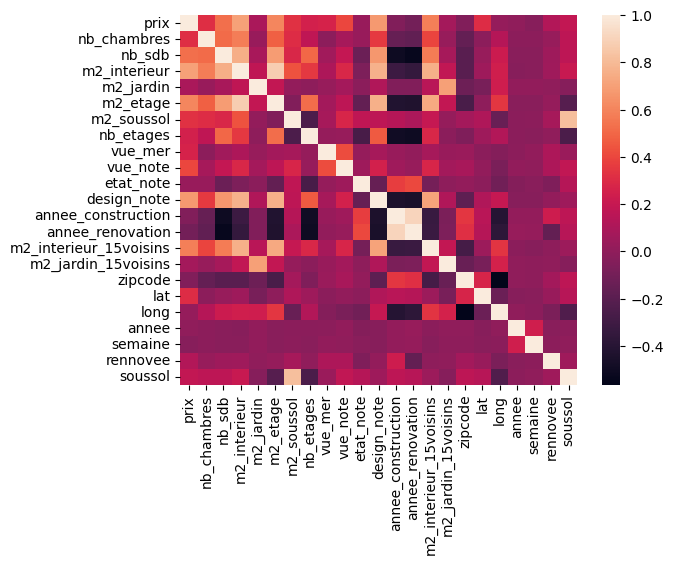

In [20]:
sns.heatmap(train.corr())

Map plot

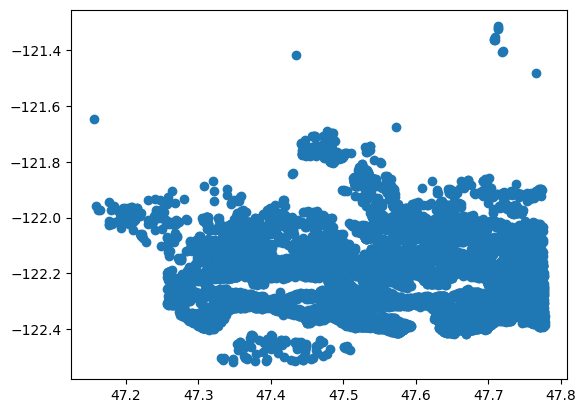

In [ ]:
plt.scatter(train['lat'],train['long'])

### date et position pour feature engineering (densité ?)

In [112]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\morea\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [113]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd



# Create map
m = folium.Map(location=[47.5, -122], zoom_start=10)

# Add Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Add points to cluster
for idx, row in train.iterrows():
    folium.Marker([row["lat"], row["long"]]).add_to(marker_cluster)

# Save and display
m.save("optimized_map.html")
m

## Cluster

In [21]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [22]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long', 'annee', 'semaine', 'rennovee', 'soussol'],
      dtype='object')

In [23]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [24]:
cah_model = AgglomerativeClustering(distance_threshold=0,
                                       metric='euclidean',
                                       linkage='ward',
                                       n_clusters=None)
cah = cah_model.fit(train)

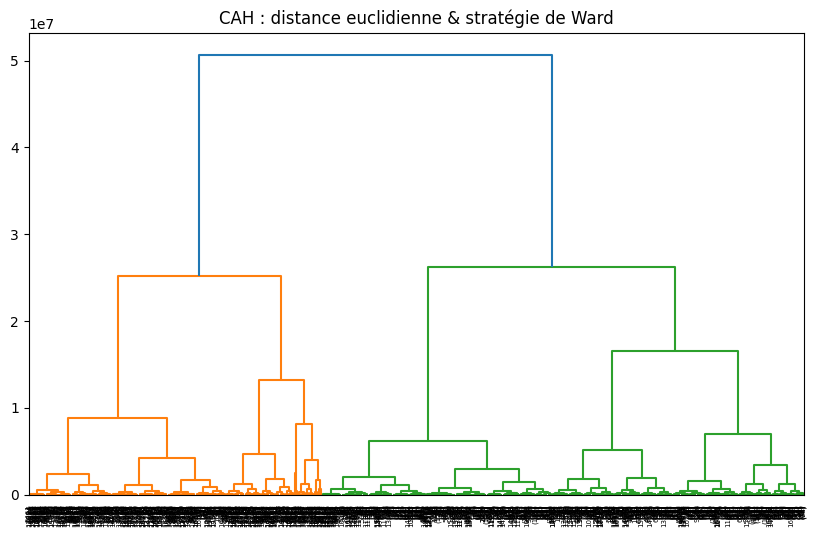

In [25]:
plt.subplots(figsize=(10, 6))
plt.title('CAH : distance euclidienne & stratégie de Ward')
# plot the top three levels of the dendrogram
plot_dendrogram(cah, truncate_mode="level", p=10)
plt.show()

In [26]:
n=train.shape[0]

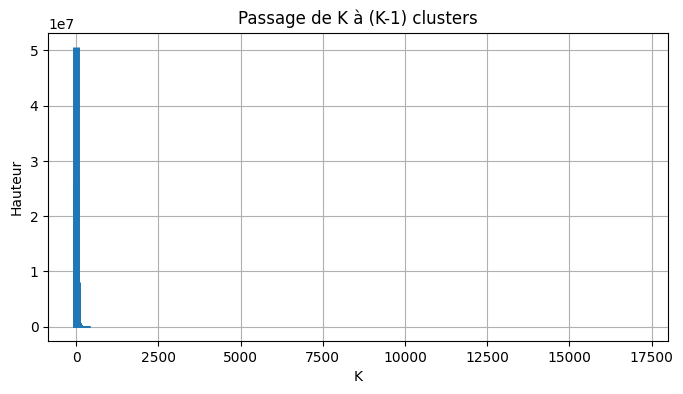

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(range(2, n+1), 0, np.flip(np.sort(cah.distances_)), linewidth=5)
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

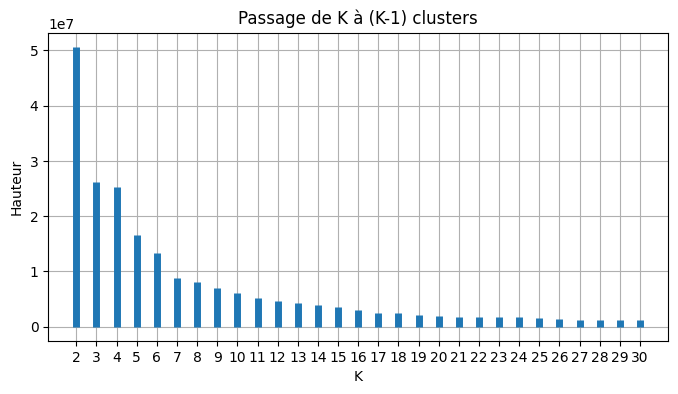

In [ ]:
k_max = 30

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(range(2, k_max+1), 0, np.flip(np.sort(cah.distances_))[0:k_max-1], linewidth=5)
ax.set_xticks(range(2, k_max+1))
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel('Hauteur')
plt.title('Passage de K à (K-1) clusters')
plt.show()

In [27]:
K = 5

cah_model = AgglomerativeClustering(metric='euclidean',
                                   linkage='ward',
                                   n_clusters=K)
cah = cah_model.fit(train)

train['cluster_cah_ward'] = cah.fit_predict(train)
train['cluster_cah_ward'].value_counts()

cluster_cah_ward
2    6712
3    6331
4    2691
1    1152
0     261
Name: count, dtype: int64

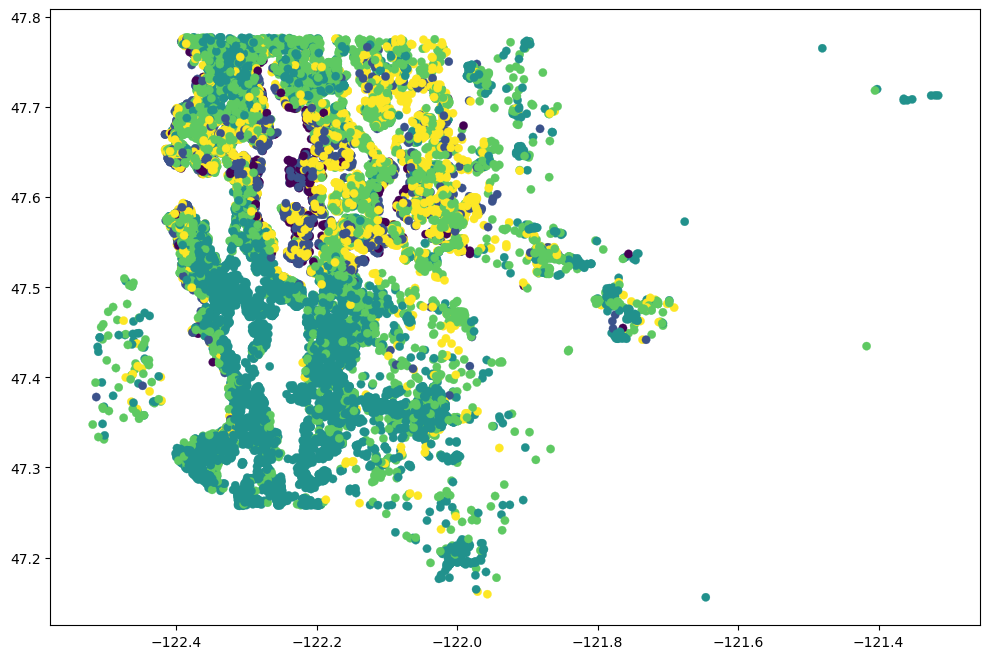

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(train['long'], train['lat'],c=train['cluster_cah_ward'],linewidths=0.2)

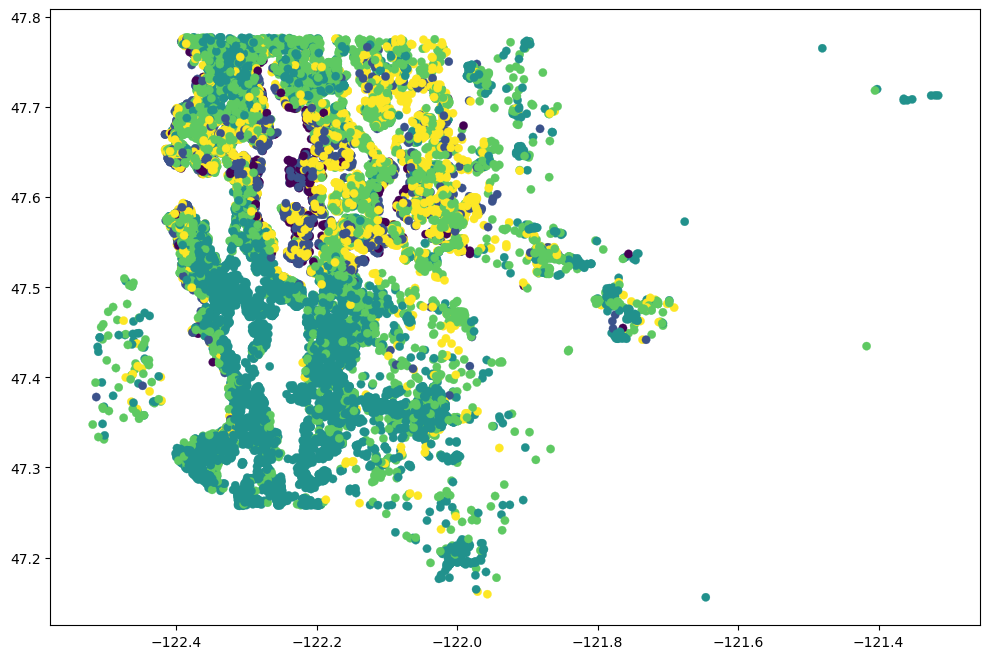

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(train['long'], train['lat'],c=train['cluster_cah_ward'],linewidths=0.2)

In [125]:
"""i=0
for stat in train.columns:
    plt.figure(i)
    plt.ylabel("prix")
    plt.xlabel(str(stat))
    plt.scatter(train[stat], train['prix'],c=train['cluster_cah_ward'])
    i+=1
plt.show()"""

'i=0\nfor stat in train.columns:\n    plt.figure(i)\n    plt.ylabel("prix")\n    plt.xlabel(str(stat))\n    plt.scatter(train[stat], train[\'prix\'],c=train[\'cluster_cah_ward\'])\n    i+=1\nplt.show()'

## Regression

In [28]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from statsmodels.tools import add_constant
import itertools 

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147 entries, 0 to 17146
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prix                    17147 non-null  int64  
 1   nb_chambres             17147 non-null  int64  
 2   nb_sdb                  17147 non-null  float64
 3   m2_interieur            17147 non-null  float64
 4   m2_jardin               17147 non-null  float64
 5   m2_etage                17147 non-null  float64
 6   m2_soussol              17147 non-null  float64
 7   nb_etages               17147 non-null  float64
 8   vue_mer                 17147 non-null  int64  
 9   vue_note                17147 non-null  int64  
 10  etat_note               17147 non-null  int64  
 11  design_note             17147 non-null  int64  
 12  annee_construction      17147 non-null  int64  
 13  annee_renovation        17147 non-null  int64  
 14  m2_interieur_15voisins  17147 non-null

In [30]:

train = pd.get_dummies(train, columns=['cluster_cah_ward'], dtype='int', drop_first=False)

In [31]:
def AIC_BIC_linreg(X, y, features):
    linreg_model = OLS(y, X[list(features)])
    linreg = linreg_model.fit()
    AIC = linreg.aic
    BIC = linreg.bic
    return {'model':linreg, 'AIC':AIC, 'BIC':BIC}

def linreg_forward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results=[]
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]

    for p in remaining_predictors:
        results.append(AIC_BIC_linreg(X=X, y=y, features=predictors+[p]+['const']))
    models = pd.DataFrame(results)

    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]

    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)

    return best_model

def linreg_forward_proc(X, y, crit='BIC', verbose=True):
    forward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []

    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if forward_result[crit] > forward_model_before:
                break
        forward_models.loc[i] = forward_result
        predictors = forward_models.loc[i]['model'].model.exog_names
        forward_model_before = forward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']

    return(forward_models['model'][len(forward_models['model'])])


y=train['prix']
X=train.drop(['prix'], axis=1)
linreg_forward = linreg_forward_proc(add_constant(X), y, crit='AIC', verbose=True)

Selected predictors: ['m2_interieur', 'const'] AIC: 476802.6705204416 BIC: 476818.16967746196
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'const'] AIC: 469626.5149621342 BIC: 469649.7636976647
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'const'] AIC: 462959.5369722486 BIC: 462990.5352862893
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'const'] AIC: 455654.37590192957 BIC: 455693.12379448046
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'const'] AIC: 450634.0045227838 BIC: 450680.50199384487
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'lat', 'const'] AIC: 449929.71834761405 BIC: 449983.9653971853
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_

<Axes: xlabel='semaine'>

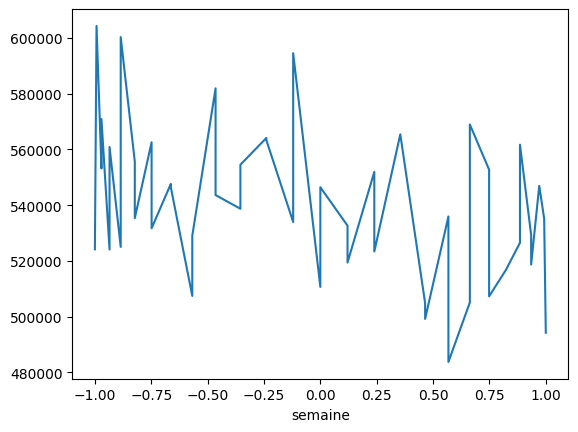

In [32]:
train.groupby('semaine')['prix'].mean().plot()

In [33]:
len(['m2_interieur', 'lat', 'vue_note', 'cluster_cah_ward', 'design_note', 'annee_construction', 'vue_mer', 'zipcode', 'nb_sdb', 'nb_chambres', 'long', 'etat_note', 'm2_soussol', 'annee', 'm2_interieur_15voisins', 'nb_etages', 'rennovee', 'm2_jardin_15voisins', 'm2_jardin', 'soussol', 'm2_etage', 'annee_renovation', 'const'])

23

In [34]:
train.columns

Index(['prix', 'nb_chambres', 'nb_sdb', 'm2_interieur', 'm2_jardin',
       'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer', 'vue_note',
       'etat_note', 'design_note', 'annee_construction', 'annee_renovation',
       'm2_interieur_15voisins', 'm2_jardin_15voisins', 'zipcode', 'lat',
       'long', 'annee', 'semaine', 'rennovee', 'soussol', 'cluster_cah_ward_0',
       'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3',
       'cluster_cah_ward_4'],
      dtype='object')

In [35]:
def linreg_backward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results = []
    
    for combi in itertools.combinations(predictors, len(predictors)-1):
        results.append(AIC_BIC_linreg(X=X, y=y, features=list(combi)+['const']))
    models = pd.DataFrame(results)
    
    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]
    
    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)
    
    return best_model

def linreg_backward_proc(X, y, crit='BIC', verbose=True):
    backward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = list(X.columns.difference(['const']))
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if backward_result[crit] > backward_model_before:
                break
        backward_models.loc[i] = backward_result
        predictors = backward_models.loc[i]['model'].model.exog_names
        backward_model_before = backward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']
    
    return(backward_models['model'][len(backward_models['model'])])


y=train['prix']
X=train.drop(['prix'], axis=1)
linreg_backward = linreg_backward_proc(add_constant(X), y, crit='AIC', verbose=True)

Selected predictors: ['annee', 'annee_construction', 'annee_renovation', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'cluster_cah_ward_4', 'design_note', 'etat_note', 'lat', 'long', 'm2_etage', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin', 'm2_jardin_15voisins', 'm2_soussol', 'nb_chambres', 'nb_etages', 'nb_sdb', 'rennovee', 'semaine', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 448745.46012583445 BIC: 448939.1995885889
Selected predictors: ['annee', 'annee_construction', 'annee_renovation', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'cluster_cah_ward_4', 'design_note', 'etat_note', 'lat', 'long', 'm2_etage', 'm2_interieur', 'm2_interieur_15voisins', 'm2_jardin', 'm2_jardin_15voisins', 'm2_soussol', 'nb_chambres', 'nb_etages', 'nb_sdb', 'semaine', 'vue_mer', 'vue_note', 'zipcode', 'const'] AIC: 448743.46063572244 BIC: 448929.4505199667
Selected predictors: ['annee', 'annee_construction

In [36]:
def linreg_stepwise_proc(X, y, crit='BIC', verbose=True):
    stepwise_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []
    stepwise_model_before = AIC_BIC_linreg(X, y, predictors+['const'])[crit]
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        stepwise_models.loc[i] = forward_result
        predictors = stepwise_models.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backward_result = linreg_backward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if backward_result[crit]< forward_result[crit]:
            stepwise_models.loc[i] = backward_result
            predictors = stepwise_models.loc[i]['model'].model.exog_names
            stepwise_model_before = stepwise_models.loc[i][crit]
            predictors = [k for k in predictors if k != 'const']
        if stepwise_models.loc[i][crit]> stepwise_model_before:
            break
        else:
            stepwise_model_before = stepwise_models.loc[i][crit]
        
    return(stepwise_models['model'][len(stepwise_models['model'])])


linreg_stepwise = linreg_stepwise_proc(add_constant(X), y, crit='AIC', verbose=True)

Selected predictors: ['m2_interieur', 'const'] AIC: 476802.6705204416 BIC: 476818.16967746196
Selected predictors: ['const'] AIC: 488503.0943163188 BIC: 488510.843894829
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'const'] AIC: 469626.5149621342 BIC: 469649.7636976647
Selected predictors: ['m2_interieur', 'const'] AIC: 476802.6705204416 BIC: 476818.16967746196
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'const'] AIC: 462959.5369722486 BIC: 462990.5352862893
Selected predictors: ['cluster_cah_ward_0', 'cluster_cah_ward_1', 'const'] AIC: 469159.3838362902 BIC: 469182.63257182075
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'const'] AIC: 455654.37590192957 BIC: 455693.12379448046
Selected predictors: ['cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'const'] AIC: 459000.7390555443 BIC: 459031.737369585
Selected predictors: ['m2_interieur', 'cluster_cah_ward_0',

In [37]:
len(['m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'lat', 'vue_mer', 'design_note', 'annee_construction', 'vue_note', 'nb_sdb', 'nb_chambres', 'zipcode', 'long', 'etat_note', 'annee', 'nb_etages', 'annee_renovation', 'm2_jardin_15voisins', 'm2_interieur_15voisins', 'cluster_cah_ward_4', 'const'])

22

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [39]:
col=['prix','m2_interieur', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'lat', 'vue_mer', 'design_note', 'annee_construction', 'vue_note', 'nb_sdb', 'nb_chambres', 'zipcode', 'long', 'etat_note', 'annee', 'nb_etages', 'annee_renovation', 'm2_jardin_15voisins', 'm2_interieur_15voisins', 'cluster_cah_ward_4']

In [52]:
col2=['prix','annee', 'annee_construction', 'annee_renovation', 'cluster_cah_ward_0', 'cluster_cah_ward_1', 'cluster_cah_ward_2', 'cluster_cah_ward_3', 'design_note', 'etat_note', 'lat', 'long', 'm2_etage', 'm2_soussol', 'nb_chambres', 'nb_etages', 'nb_sdb', 'vue_mer', 'vue_note', 'zipcode']

In [42]:
xxxx=train

In [53]:
train=xxxx[col2]

In [54]:
L_MSE=[]
L_RMSE=[]
L_MAPE=[]

for i in range(100):
  train_portion = 0.8
  train_wagon = (np.random.rand(train.shape[0]) < train_portion)
  data_train = train[train_wagon == True]
  X_test = train[train_wagon == False].drop('prix',axis=1)
  y_test = train[train_wagon == False]['prix']

  y=train[train_wagon == True]['prix']
  X=train[train_wagon == True].drop('prix',axis=1)

  reg2 = OLS(y,X).fit()
  prediction=reg2.predict(X_test)

  MSE = mean_squared_error(y_test,prediction)
  RMSE=np.sqrt(MSE)
  MAPE=mean_absolute_percentage_error(y_test, prediction)
  L_MSE.append(MSE)
  L_RMSE.append(RMSE)
  L_MAPE.append(MAPE)

#print(np.argmin(L_MSE))

print(np.mean(L_MSE))
print(np.mean(L_RMSE))
print(np.mean(L_MAPE))

14534608935.659348
119734.85708962721
0.14136929587640126


In [46]:
train.mean()

prix                      543193.928034
nb_chambres                    3.371669
nb_sdb                         2.123010
m2_interieur                 193.732114
m2_jardin                   1411.998121
m2_etage                     166.652667
m2_soussol                    27.079448
nb_etages                      1.497638
vue_mer                        0.008048
vue_note                       0.235376
etat_note                      3.409343
design_note                    7.668630
annee_construction            43.167668
annee_renovation              40.738963
m2_interieur_15voisins       184.852674
m2_jardin_15voisins         1187.418834
zipcode                    98077.654808
lat                           47.560131
long                        -122.213735
annee                       2014.322389
semaine                       -0.148585
rennovee                       0.043156
soussol                        0.390797
cluster_cah_ward_0             0.015221
cluster_cah_ward_1             0.067184


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
L=[]
for i in range(10):
    train_portion = 0.8
    train_wagon = (np.random.rand(train.shape[0]) < train_portion)
    data_train = train[train_wagon == True]
    X_test = train[train_wagon == False].drop('prix',axis=1)
    y_test = train[train_wagon == False]['prix']

    y=train[train_wagon == True]['prix']
    X=train[train_wagon == True].drop('prix',axis=1)

    model_RFR = RandomForestRegressor(random_state=0)

    model_RFR.fit(X,y)
    Y_pred_for_test=model_RFR.predict(X_test)
    Y_pred_for_train=model_RFR.predict(X)

    L.append(np.sqrt(mean_squared_error(y_test,Y_pred_for_test)))


AttributeError: 'list' object has no attribute 'mean'

In [50]:
print(np.mean(L))
print(np.min(L))

89864.86214354869


81734.91702847792

In [77]:
model_RFR = RandomForestRegressor(random_state=0)

model_RFR.fit(X,y)
Y_pred_for_test=model_RFR.predict(X_test)
Y_pred_for_train=model_RFR.predict(X)

In [78]:
print('MSE test :',mean_squared_error(y_test,Y_pred_for_test))
print('MSE train :',mean_squared_error(y,Y_pred_for_train))


print('RMSE test :',np.sqrt(mean_squared_error(y_test,Y_pred_for_test)))
print('RMSE train :',np.sqrt(mean_squared_error(y,Y_pred_for_train)))

MSE test : 8986867392.020142
MSE train : 1528041376.9908726
RMSE test : 94799.0896159881
RMSE train : 39090.16982555682
